# Install and Import Modules

In [ ]:
# Installing the required modules 
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
# Installing the CPU and CUDA
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

In [1]:
# Importing the different libraries
import cv2 
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Defining the path of images

In [89]:
# Optional by defining the path of each images
img0_path = './images/text0.jpg'
img1_path = './images/text1.jpg'
img2_path = './images/text2.jpg'
img3_path = './images/text3.jpg'
img4_path = './images/text4.jpg'
img5_path = './images/text5.jpg'
img6_path = './images/text6.jpg'
img7_path = './images/text7.jpg'
img8_path = './images/text8.jpg'
img9_path = './images/text9.jpg'

In [90]:
# Extracting the path of images one by one in the form of list
img_path = "./images/"
create_path = lambda f : os.path.join(img_path, f)
test_image_files = os.listdir(img_path)

for f in test_image_files:
    print(f)

text0.jpg
text1.jpg
text2.jpg
text3.jpg
text4.jpg
text5.jpg
text6.png
text7.png
text8.jpg
text9.png


In [101]:
# loading the path of image by passing the position of the image
img = test_image_files[3]
path = create_path(img)

# Recognizing the text from images

In [102]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''
    
    reader = easyocr.Reader(['en'])        # For English - 'en'  And,  For Hindi - 'hi'
    return reader.readtext(img_path)

In [103]:
result = recognize_text(path)

In [104]:
result

[([[261, 25], [779, 25], [779, 69], [261, 69]],
  'SHADOWING PRACTICE 08',
  0.8982319248180386),
 ([[47, 94], [925, 94], [925, 136], [47, 136]],
  'The city has contracted with Acme Construction to improve certain',
  0.7656371536465789),
 ([[43, 139], [419, 139], [419, 177], [43, 177]],
  'roads in your neighborhood:',
  0.969881332955836),
 ([[433, 139], [925, 139], [925, 175], [433, 175]],
  'Work will commence on June 3rd, as',
  0.7750679919397159),
 ([[45, 180], [951, 180], [951, 224], [45, 224]],
  'shown in the project schedule.This work will require road closures at',
  0.8792539972072624),
 ([[45, 227], [521, 227], [521, 265], [45, 265]],
  'certain times throughout the project:',
  0.7854811215184639),
 ([[529, 223], [847, 223], [847, 265], [529, 265]],
  'We will be starting work',
  0.9809640826552635),
 ([[45, 271], [959, 271], [959, 309], [45, 309]],
  'at 7:00 AM and will finish around 5.00 PM: If you are within the active',
  0.6320608882406212),
 ([[45, 313], [937, 3

# Loading the image

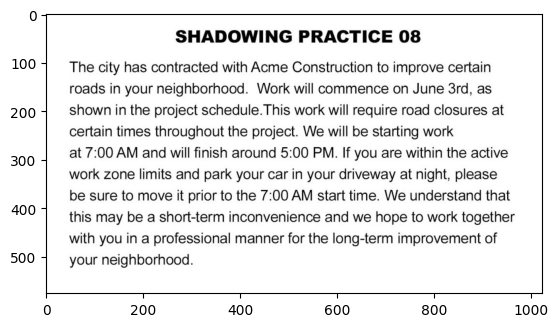

In [105]:
# Showing the current(Selected) image
img_1 = cv2.imread(path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Process of Extraction

In [106]:
def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''
    
    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)
    
    # Recognise text
    result = recognize_text(img_path)
    
    # If OCR prob is over 0.2, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')
            
            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            
            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)
            
            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)
            
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./Output/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: SHADOWING PRACTICE 08 (Probability: 0.90)
Detected text: The city has contracted with Acme Construction to improve certain (Probability: 0.77)
Detected text: roads in your neighborhood: (Probability: 0.97)
Detected text: Work will commence on June 3rd, as (Probability: 0.78)
Detected text: shown in the project schedule.This work will require road closures at (Probability: 0.88)
Detected text: certain times throughout the project: (Probability: 0.79)
Detected text: We will be starting work (Probability: 0.98)
Detected text: at 7:00 AM and will finish around 5.00 PM: If you are within the active (Probability: 0.63)
Detected text: work zone limits and park your car in your driveway at night, please (Probability: 0.51)
Detected text: be sure to move it prior to the 7:00 AM start time. We understand that (Probability: 0.57)
Detected text: this may be a short-term inconvenience and we hope to work together (Probability: 0.87)
Detected text: with you in a (Probability: 0.60)
De

<Figure size 640x480 with 0 Axes>

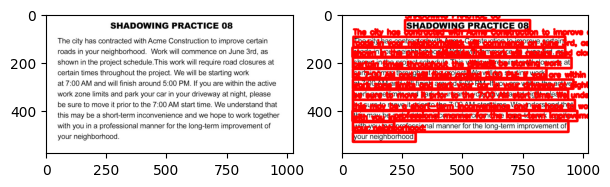

In [107]:
overlay_ocr_text(path, 'Text3_Output')

# Final Output(text) 

In [108]:
# Extracting text from the image
def ocr_text(img_path):
    
    result = recognize_text(img_path)
    
    # If OCR prob is over 0.2, overlay text
    for(bbox, text, prob) in result:
        if prob:
            print(f'{text}')
            

In [109]:
# Extracted Text
ocr_text(path)

SHADOWING PRACTICE 08
The city has contracted with Acme Construction to improve certain
roads in your neighborhood:
Work will commence on June 3rd, as
shown in the project schedule.This work will require road closures at
certain times throughout the project:
We will be starting work
at 7:00 AM and will finish around 5.00 PM: If you are within the active
work zone limits and park your car in your driveway at night, please
be sure to move it prior to the 7:00 AM start time. We understand that
this may be a short-term inconvenience and we hope to work together
with you in a
professional manner for the long-term improvement of
your neighborhood:
